## Simulación e cálculos do reciclclado
La simulación de una planta de reciclaje de biodiesel (FAME - _Fatty Acid Myl Esters_) que ha sido utilizado como disolvente industrial es un proyecto de ingeniería complejo que debe abordarse por partes. El biodiesel tiene un alto punto de ebullición y propiedades termodinámicas específicas que hacen que su recuperación requiera cuidados para evitar la degradación térmica.

A continuación se presena una hoja de ruta estructurada paso a paso de la siulación:

### 1\. Definición del problema y la corriente de entrada.

Antes de abrir cualquier software, necesita datos concretos:

- **Composición del Biodiesel:** Suele ser una mezcla de ésteres metílicos (C16, C18, etc.). Para la simulación, **Oleato de metilo** se utiliza a menudo como "pseudocomponente" representativo si no se cuenta con la cromatografía exacta.  
- **Contaminantes:** ¿Qué disolvió el biodiesel?
  - Pinturas o resinas? (Sólidos o polímeros).
  - ¿Aceites minerales? (Hidrocarburos pesados).
  - ¿Agua?
- **Especificaciones del producto:** ¿Qué pureza se necesita para reutilizar como solvente? (por ejemplo, 99 % de pureza, <0,05 % de agua).    

### 2\. Selección de Operaciones Unitarias

Dependiendo de los contaminantes, el proceso variará, pero el esquema clásico para recuperar solventes de alto punto de ebullición suele ser:

1. **Filtración:** Si el biodiesel ha arrastrado partículas sólidas o lodos.
2. **Decantación (flash):** Si hay agua o solventes altamente volátiles mezclados, un tanque flash puede separarlos fácilmente.
3. **Destilación al vacío:** **Este es el punto crítico.** El biodiesel se degrada (oxida o polimeriza) a altas temperaturas (generalmente superiores).
   - Como su punto de ebullición a presión atmosférica es muy alto (), **es obligatorio utilizar vacío** para bajar la temperatura de ebullición y destilarlo sin "quemarlo".

### 3\. Escolla do Software de Simulación

Tes varias opcións segundo o teu orzamento e acceso:

-   **Aspen Plus / Aspen HYSYS:** O estándar da industria. Ten bases de datos moi completas para FAMEs.
    
-   **ChemCAD:** Moi potente para procesos químicos e destilacións.
    
-   **DWSIM (Recomendado para empezar):** É **Open Source e gratuíto**. Ten unha boa base de datos e permite simular destilacións e reactores. Para un proxecto académico ou de prototipado, é a mellor opción.
    

### 4\. Modelo Termodinámico (O "motor" da simulación)

Esta é a decisión máis técnica que debes tomar. O biodiesel é unha molécula polar e orgánica.
-   **Non uses gas ideal.**
-   **Recomendación:** Usa modelos de coeficiente de actividade como **NRTL** ou **UNIQUAC**. Funcionan moi ben para mesturas líquido-líquido e para predicir o equilibrio cando hai auga ou alcohois presentes.
-   Se a mestura é só con hidrocarburos (aceites), **Peng-Robinson** podería funcionar, pero NRTL é máis seguro se non estás seguro.
    

___

### 5\. Pasos para montar a simulación (Exemplo en DWSIM/Aspen)

Unha vez elixido o software, segue esta orde:

1.  **Configuración de Compoñentes:**
    
    -   Engade _Methyl Oleate_ (como biodiesel base).
        
    -   Engade _Water_ (se hai humidade).
        
    -   Engade o contaminante principal (ex. _Toluene_ ou un compoñente xenérico pesado).
        
2.  **Selección do Paquete de Fluídos:** Selecciona **NRTL** ou **UNIQUAC**.
    
3.  **Deseño do Diagrama de Fluxo (PFD):**
    
    -   Coloca unha _Corrente de Alimentación_ (Feed) coa temperatura e presión ambiente.
        
    -   Coloca unha _Columna de Destilación Rigorosa_.
        
4.  **Configuración da Columna:**
    
    -   **Presión do condensador:** Establece unha presión de baleiro (ex. ou ).
        
    -   **Razón de Refluxo:** Comeza con algo conservador, como 1.5 ou 2.
        
    -   **Especificacións:** Define que queres obter polo fondo (o biodiesel limpo adoita saír polo fondo se os contaminantes son volátiles, ou polo tope se os contaminantes son lodos pesados).
        

___

### Resumo dos retos principais

> **Nota Importante:** A diferenza de recuperar acetona ou etanol, o biodiesel non se evapora facilmente. Se os teus residuos son **máis pesados** que o biodiesel (ex. resinas), terás que evaporar o biodiesel (moita enerxía). Se os residuos son **máis lixeiros** (ex. auga, disolventes lixeiros), basta con facer un _stripping_ ou evaporar os lixeiros e deixar o biodiesel líquido (moito máis eficiente).

**Gustaríache que che axude a configurar unha simulación básica paso a paso usando DWSIM (que é gratuíto)?** Poderiamos definir xuntos a composición de entrada.

me gustaría simula en python mediante a operación de evaporacion en un agitated thin film evaporator (ATFE). hai algún molelo en python para o ATFE?

Excelente elección. Un **Evaporador de Película Agitada (ATFE - Agitated Thin Film Evaporator)** é, de feito, o equipo ideal para o biodiesel sucio porque minimiza o tempo de residencia e evita a degradación térmica ("queimar" o biodiesel), ademais de manexar ben a viscosidade.

Respondendo á túa pregunta: **Non, non existe unha libraría específica de Python chamada "ATFE-model" ou similar.**

A diferenza da simulación de redes neuronais ou datos (onde tes `scikit-learn`), na enxeñaría de procesos en Python adoitas ter que construír o modelo de operación unitaria ti mesmo, ou usar librarías de termodinámica xenérica para apoiar os teus cálculos.

Para simular isto en Python, terás que crear un **Modelo Discreto (paso a paso)** ou resolver un sistema de **Ecuacións Diferenciais Ordinarias (EDOs)** ao longo da lonxitude do evaporador.

Aquí tes como plantexalo:

### 1\. A Física do ATFE (O que debes programar)

O ATFE non é un tanque mesturado; é un tubo longo. Debes modelalo dividindo o tubo en pequenas "fatias" ou nodos (volume de control).

En cada fatia (), ocorren tres cousas principais:

1.  **Transferencia de Calor:** Da parede quente () ao filme de líquido ().
    
2.  **Evaporación:** Parte do disolvente volátil pasa a vapor debido á calor recibida.
    
3.  **Cambio de Composición:** O líquido que pasa á seguinte fatia é máis rico en biodiesel e máis viscoso.
    

**As variables clave son:**

-   (Coeficiente global de transferencia de calor): No ATFE, este valor é alto debido á axitación mecánica.
    
-   (Calor latente de vaporización): Enerxía necesaria para evaporar o disolvente.
    

### 2\. Librarías de Python Necesarias

Para facer isto, necesitarás:

-   **NumPy:** Para manexar vectores e matrices.
    
-   **SciPy (integrate):** Para resolver as ecuacións diferenciais (`odeint` ou `solve_ivp`) se queres ser rigoroso, ou simplemente un bucle `for` se fas un modelo de diferenzas finitas.
    
-   **Thermo** (Opcional pero recomendada): Unha libraría open-source de Python para obter propiedades químicas (, puntos de ebulición, densidade) sen ter que escribilas a man. (`pip install thermo`).
    

### 3\. Exemplo de Código (Estrutura do Modelo)

_script_ básico en Python que simula un ATFE usando un enfoque de **diferenzas finitas**. Este código asume que queres recuperar Biodiesel (pesado) evaporando un disolvente lixeiro (ex. Hexano ou Metanol).

Iniciando simulación ATFE. Feed: 500.0 kg/h


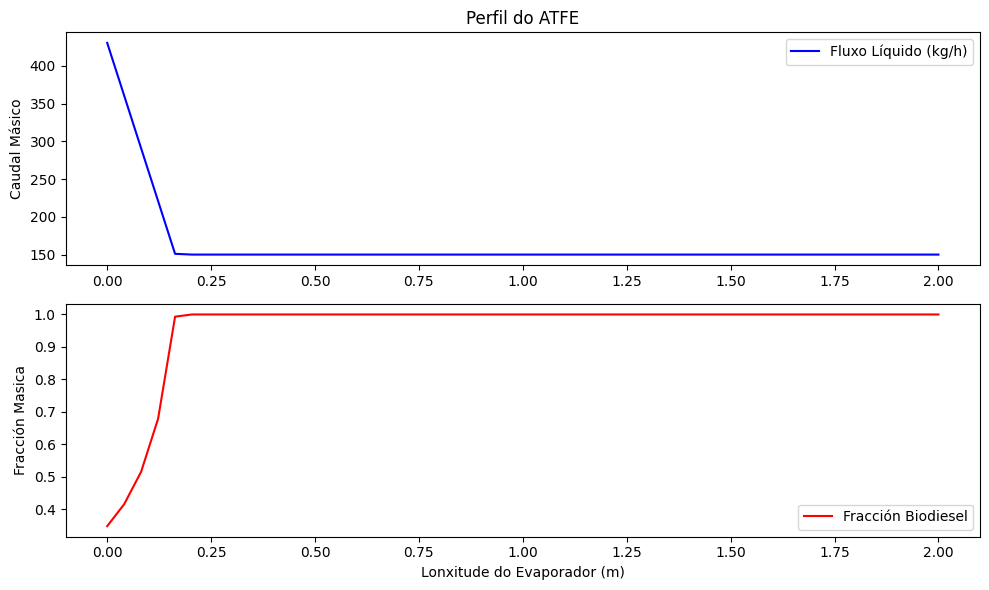

Saída Final: 150.00 kg/h cunha pureza de 100.0%


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. PARÁMETROS DE DESEÑO DO ATFE ---
L = 2.0           # Lonxitude do equipo (m)
D = 0.5           # Diámetro interno (m)
Area_total = np.pi * D * L
N_steps = 50      # Número de "fatias" para a simulación
dA = Area_total / N_steps
T_wall = 150.0    # Temperatura da parede (°C) (Aceite térmico ou vapor)
P_op = 0.1        # Presión de operación (bar) - BALEIRO é crucial

# --- 2. PROPIEDADES (Simplificadas para o exemplo) ---
# Aquí podes usar a libraría 'thermo' para facelo real
# Asumimos unha mestura binaria: [Biodiesel, Disolvente]
Heat_vap_solvente = 350.0  # kJ/kg (Calor latente aproximada)
Cp_mix = 2.0               # kJ/kg.K (Calor específica media)

# O coeficiente U varía coa viscosidade, pero empezamos cun valor fixo
# En ATFE, U adoita ser alto (1000 - 2000 W/m2K)
U = 1.2  # kW/m2.K 

# --- 3. CONDICIÓNS DE ENTRADA (FEED) ---
m_dot_feed = 500.0   # kg/h
x_biodiesel = 0.3    # 30% Biodiesel
x_solvent = 0.7      # 70% Disolvente
T_feed = 60.0        # Temperatura de entrada (°C)

# Temperatura de ebulición do disolvente a P_op (ex. 0.1 bar)
# Isto debería calcularse con Antoine ou termodinámica real
T_bp_solvent = 45.0  

# --- 4. SIMULACIÓN (Bucle ao longo da lonxitude) ---
# Arrays para gardar resultados
temp_profile = []
mass_flow_profile = []
composition_profile = []

# Inicialización
m_liquid = m_dot_feed
x_curr_bio = x_biodiesel
T_curr = T_feed

print(f"Iniciando simulación ATFE. Feed: {m_dot_feed} kg/h")

for i in range(N_steps):
    # 1. Quentar o líquido ata o punto de ebulición?
    # Se T_curr < T_bp, a calor úsase para calor sensible (subir T)
    # Se T_curr >= T_bp, a calor úsase para calor latente (evaporar)
    
    # Calor transferida neste segmento Q = U * A * dT
    Q_transferred = U * dA * (T_wall - T_curr) # kW
    
    m_evap = 0.0
    
    if T_curr < T_bp_solvent:
        # Só quentamento sensible
        dT = Q_transferred / (m_liquid * Cp_mix / 3600) # axuste unidades
        T_curr += dT
        # Límite físico: non pasar a T de ebulición nun só paso sen evaporar
        if T_curr > T_bp_solvent: T_curr = T_bp_solvent
    else:
        # Evaporación (Asumimos T constante durante ebulición pura do disolvente)
        # Q = m_evap * lambda
        m_evap = (Q_transferred * 3600) / Heat_vap_solvente # kg/h
        
        # Non podemos evaporar máis disolvente do que hai
        m_solvent_available = m_liquid * (1 - x_curr_bio)
        if m_evap > m_solvent_available:
            m_evap = m_solvent_available
            # Aquí a T empezaría a subir de novo (recalentamento do biodiesel)
            
    # Balances de masa
    m_liquid_new = m_liquid - m_evap
    
    # Balances de compoñentes (O biodiesel non evapora, é non-volátil aquí)
    m_bio = m_liquid * x_curr_bio
    if m_liquid_new > 0:
        x_new_bio = m_bio / m_liquid_new
    else:
        x_new_bio = 1.0 # Seco total (perigoso na realidade)

    # Actualizar variables para o seguinte paso
    m_liquid = m_liquid_new
    x_curr_bio = x_new_bio
    
    # Gardar datos
    temp_profile.append(T_curr)
    mass_flow_profile.append(m_liquid)
    composition_profile.append(x_curr_bio)

# --- 5. VISUALIZACIÓN ---
x_axis = np.linspace(0, L, N_steps)

plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(x_axis, mass_flow_profile, 'b-', label='Fluxo Líquido (kg/h)')
plt.ylabel('Caudal Másico')
plt.title('Perfil do ATFE')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x_axis, composition_profile, 'r-', label='Fracción Biodiesel')
plt.xlabel('Lonxitude do Evaporador (m)')
plt.ylabel('Fracción Masica')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Saída Final: {m_liquid:.2f} kg/h cunha pureza de {x_curr_bio*100:.1f}%")



### Melloras do modelo na versión "Pro"

Se vas usar isto para un traballo serio ou tese, debes mellorar dous puntos no código:

1.  **VLE (Equilibrio Vapor-Líquido):** Eu asumín que a temperatura de ebulición é constante (). En realidade, a medida que o disolvente se evapora e a concentración de biodiesel aumenta, a temperatura de ebulición da mestura **sobe** (Elevación do punto de ebulición). Necesitas chamar a `thermo` en cada paso para recalcular a temperatura de equilibrio (Bubble Point).
    
2.  **Viscosidade e U Variable:** A medida que o biodiesel se concentra, a viscosidade dispárase. Isto fai que o coeficiente baixe ao final do tubo. Un modelo de ATFE bo ten unha fórmula que recalcula en función da viscosidade local.
    

**Queres que che explique como instalar e usar a libraría `thermo` para calcular o punto de ebulición real da mestura?** Iso daríache un resultado moito máis realista.

Perfecto. Vamos a dar el salto de una "calculadora básica" a una **simulación de ingeniería real**.

Usar la librería `thermo` permitirá que tu código entienda que:

1.  A medida que el disolvente se evapora, la mezcla se vuelve "más pesada" y **la temperatura de ebulición sube** (esto es crítico para no degradar el biodiesel).
    
2.  La energía necesaria para evaporar () cambia según la composición.
    

### Paso 1: Instalación

Abre tu terminal o consola de comandos y ejecuta:

_(Necesitas `scipy` porque `thermo` lo usa para resolver ecuaciones de equilibrio)._

___

### Paso 2: El Código de Simulación ATFE (Actualizado)

He modificado el código anterior. Ahora, en lugar de usar temperaturas fijas, le preguntamos a la librería `thermo` en cada paso del evaporador: _"Oye, con esta mezcla de Biodiesel y Disolvente a esta presión de vacío, ¿a qué temperatura hierve?"_.

Para este ejemplo, usaré **Metanol** como disolvente (muy común) y **Oleato de Metilo** como el sustituto químico del Biodiesel.

```python
import numpy as np
import matplotlib.pyplot as plt
from thermo import Mixture

# --- CONVERSIÓN DE UNIDADES AUXILIARES ---
def C_to_K(c): return c + 273.15
def K_to_C(k): return k - 273.15
def bar_to_Pa(b): return b * 100000.0

# ==========================================
# 1. PARÁMETROS DEL EQUIPO (ATFE)
# ==========================================
L = 3.0             # Metros (Es un equipo grande)
D = 0.5             # Metros
Area_total = np.pi * D * L
N_steps = 50        # Nodos de simulación
dA = Area_total / N_steps

# Condiciones de Operación (BALEIRO / VACÍO)
P_op_bar = 0.1      # 100 mbar (Vacío moderado)
P_op_Pa = bar_to_Pa(P_op_bar)

# Calefacción (Aceite térmico o Vapor en la camisa)
T_wall_C = 160.0    
T_wall_K = C_to_K(T_wall_C)

# Coeficiente de Transferencia de Calor (U)
# En un ATFE real, esto baja al final cuando aumenta la viscosidad.
# Aquí usamos un promedio conservador.
U = 1200.0          # W/(m2.K) (Nota: Watts, no kW)

# ==========================================
# 2. ALIMENTACIÓN (FEED)
# ==========================================
flujo_masico_total = 500.0 / 3600.0  # kg/s (convertido de kg/h)
w_biodiesel = 0.20                   # 20% Biodiesel en peso
w_methanol = 0.80                    # 80% Metanol en peso
T_feed_C = 50.0
T_curr_K = C_to_K(T_feed_C)

# Definimos los componentes químicos para 'thermo'
# CAS del Oleato de Metilo (Biodiesel): 112-62-9
# CAS del Metanol: 67-56-1
comps = ['methyl oleate', 'methanol']

print(f"--- Iniciando Simulación Rigurosa con Thermo ---")
print(f"Presión: {P_op_bar} bar | T Pared: {T_wall_C} °C")

# Arrays para gráficas
len_axis = []
temp_profile = []
w_bio_profile = []
evap_rate_profile = []

m_liquid = flujo_masico_total
w_curr_bio = w_biodiesel
w_curr_meth = w_methanol

for i in range(N_steps):
    # --- A. LLAMADA A THERMO (El "Cerebro") ---
    # Creamos la mezcla en el estado actual
    # Usamos fracciones másicas (ws)
    mix = Mixture(comps, ws=[w_curr_bio, w_curr_meth], T=T_curr_K, P=P_op_Pa)
    
    # Calculamos el punto de burbuja (Bubble Point) a la presión de operación
    # Esto nos dice la temperatura real a la que hierve ESTA mezcla específica
    try:
        # Buscamos el equilibrio líquido-vapor
        phase_eq = mix.flash(P=P_op_Pa, T=mix.bubble_point_at_P(P_op_Pa).T)
        T_boiling_K = phase_eq.T
        
        # Calor Latente de Vaporización de la mezcla (J/kg)
        # Thermo lo da en J/mol, así que hacemos una aproximación con el MW
        H_vap_J_kg = mix.Hvapm / (mix.MW / 1000.0) 
        
        # Calor Específico del líquido (J/kg.K)
        Cp_liq = mix.Cplm / (mix.MW / 1000.0)
        
    except Exception as e:
        # Si falla (ej. si se seca todo el disolvente), usamos valores previos
        print(f"Aviso en paso {i}: {e}")
        break

    # --- B. TRANSFERENCIA DE CALOR ---
    # Q = U * A * (T_pared - T_liquido)
    Q_watts = U * dA * (T_wall_K - T_curr_K)
    
    # --- C. BALANCE DE ENERGÍA Y MATERIA ---
    m_evap = 0.0
    
    if T_curr_K < T_boiling_K:
        # ZONA DE CALENTAMIENTO (Sensible)
        # Toda la energía sube la temperatura, no hay evaporación
        dT = Q_watts / (m_liquid * Cp_liq)
        T_curr_K += dT
        # Si nos pasamos del punto de ebullición en este paso, corregimos
        if T_curr_K > T_boiling_K: T_curr_K = T_boiling_K
        
    else:
        # ZONA DE EVAPORACIÓN (Latente)
        # La temperatura se mantiene (o sube ligeramente por cambio de composición)
        # Asumimos que toda la Q va a evaporar
        m_evap = Q_watts / H_vap_J_kg
        
        # Límite físico: No podemos evaporar más disolvente del que existe
        m_meth_available = m_liquid * w_curr_meth
        if m_evap > m_meth_available:
            m_evap = m_meth_available
            # Si se evapora todo, la T subiría, pero simplificamos aquí

    # Actualizar flujos
    m_liquid_new = m_liquid - m_evap
    m_bio_abs = m_liquid * w_curr_bio # El biodiesel no se evapora (asunción)
    
    # Actualizar fracciones másicas
    if m_liquid_new > 0.00001:
        w_curr_bio = m_bio_abs / m_liquid_new
        w_curr_meth = 1.0 - w_curr_bio
    else:
        w_curr_bio = 1.0 # Puro residuo sólido/viscoso
        w_curr_meth = 0.0

    # Guardar datos
    len_axis.append(i * (L/N_steps))
    temp_profile.append(K_to_C(T_curr_K))
    w_bio_profile.append(w_curr_bio)
    evap_rate_profile.append(m_evap * 3600) # Guardar en kg/h para visualizar
    
    # Avanzar variables
    m_liquid = m_liquid_new
    # (En la zona de ebullición, la T del siguiente paso será la nueva T de burbuja
    # que calculará 'thermo' al inicio del loop debido a la nueva composición)

# ==========================================
# 3. RESULTADOS Y GRÁFICAS
# ==========================================
print(f"--- Fin de Simulación ---")
print(f"Salida Líquida: {m_liquid*3600:.2f} kg/h")
print(f"Pureza Biodiesel: {w_curr_bio*100:.2f} %")

plt.figure(figsize=(10, 8))

plt.subplot(3,1,1)
plt.plot(len_axis, temp_profile, 'r', label='Temperatura Líquido (°C)')
plt.axhline(y=T_wall_C, color='k', linestyle='--', alpha=0.5, label='Temp Pared')
plt.ylabel('Temp (°C)')
plt.title('Perfil Térmico dentro del ATFE')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(len_axis, w_bio_profile, 'g', label='Fracción Biodiesel (w/w)')
plt.ylabel('Concentración')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(len_axis, evap_rate_profile, 'b', label='Tasa Evaporación (kg/h)')
plt.xlabel('Longitud del Evaporador (m)')
plt.ylabel('Evaporación')
plt.grid(True)

plt.tight_layout()
plt.show()
```

### ¿Qué verás al ejecutar esto?

1.  **La curva de Temperatura:** Verás que el líquido entra a 50°C, sube rápidamente hasta unos 65-70°C (punto de ebullición del Metanol a 0.1 bar). **Lo interesante:** A diferencia del modelo simple, verás que hacia el final del tubo, **la temperatura del líquido empieza a subir por encima del punto de ebullición del disolvente puro**.
    
    -   _Por qué:_ La librería `thermo` sabe que una mezcla con 90% de biodiesel requiere más temperatura para soltar el último resto de metanol (propiedad coligativa).
        
2.  **Pureza:** Podrás ver si tus 3 metros de tubo son suficientes. Si la gráfica verde no llega cerca del 0.99 (99%), necesitas:
    
    -   Más temperatura en la pared (cuidado con quemar el biodiesel).
        
    -   Más vacío (bajar `P_op_bar`).
        
    -   Un equipo más largo o más ancho.
        

### Siguiente paso para hacerlo "Experto"

El último eslabón perdido es la **Viscosidad**. En un ATFE, cuando el biodiesel se purifica, se vuelve aceitoso y viscoso. Esto hace que el coeficiente `U` baje drásticamente al final del tubo (el calor pasa peor a través de una pasta espesa que a través de un líquido fluido).

Si quieres, puedo mostrarte cómo hacer que `U` dependa de la viscosidad calculada por `thermo` (`mix.mul`, viscosidad de la mezcla). ¿Te interesa ajustar eso?

Esta é a diferenza entre un cálculo de servilleta e unha simulación real. No mundo real, a medida que o disolvente (metanol/hexano) se evapora, o líquido restante vólvese máis "espeso" (máis viscoso).

Nun **ATFE**, as aspas do rotor xiran para manter o líquido pegado á parede nunha capa fina.

-   **Se a viscosidade é baixa (auga/metanol):** O fluxo é moi turbulento, a transferencia de calor () é altísima.
    
-   **Se a viscosidade é alta (biodiesel puro/resinas):** O líquido ftréase, a turbulencia baixa e custa moito máis meter calor dentro. O valor de cae en picado.
    

### A Física: Como modelar variable

Na enxeñaría química, para equipos de superficie rascada (como o ATFE), soe usarse a **Teoría da Penetración** ou correlacións empíricas. Unha aproximación estándar simplificada é escalar o base en función da viscosidade:

Onde adoita estar entre e . Isto significa que se a viscosidade sobe moito, o baixa, pero non linealmente (as aspas axudan a mitigar a caída).

### O Código Python Actualizado (Con Viscosidade Dinámica)

Engadimos a lóxica para ler a viscosidade (`mix.mul`) en cada paso e recalcular a eficiencia térmica.

```python
import numpy as np
import matplotlib.pyplot as plt
from thermo import Mixture

# --- FUNCIÓNS AUXILIARES ---
def C_to_K(c): return c + 273.15
def K_to_C(k): return k - 273.15
def bar_to_Pa(b): return b * 100000.0

# ==========================================
# 1. CONFIGURACIÓN
# ==========================================
L = 3.0             
D = 0.5             
Area_total = np.pi * D * L
N_steps = 50        
dA = Area_total / N_steps

P_op_bar = 0.1      
P_op_Pa = bar_to_Pa(P_op_bar)
T_wall_C = 170.0    # Subimos un pouco a T parede para compensar a perda de U
T_wall_K = C_to_K(T_wall_C)

# --- MODELO DE U VARIABLE ---
# Definimos un U de referencia para o disolvente puro ou a alimentación
U_ref = 1500.0      # W/m2K (Moi bo ao principio)
mu_ref = 0.0004     # Pa.s (Viscosidade aprox. do metanol/feed quente ~0.4 cP)
exponent_n = 0.3    # Factor de amortiguamento das aspas

comps = ['methyl oleate', 'methanol']

# Alimentación
flujo_masico_total = 500.0 / 3600.0 
w_biodiesel = 0.20                   
w_methanol = 0.80                    
T_feed_C = 50.0
T_curr_K = C_to_K(T_feed_C)

# Arrays para gardar datos
len_axis = []
temp_profile = []
w_bio_profile = []
viscosity_profile = [] # NOVO
U_profile = []         # NOVO

m_liquid = flujo_masico_total
w_curr_bio = w_biodiesel
w_curr_meth = w_methanol

print("Iniciando simulación con Viscosidade Dinámica...")

for i in range(N_steps):
    # 1. PROPIEDADES TERMODINÁMICAS E DE TRANSPORTE
    mix = Mixture(comps, ws=[w_curr_bio, w_curr_meth], T=T_curr_K, P=P_op_Pa)
    
    # Viscosidade do líquido (mix.mul devolve Pa.s)
    try:
        mu_liq = mix.mul 
        if mu_liq is None: mu_liq = mu_ref # Fallback se falla o cálculo
    except:
        mu_liq = mu_ref

    # 2. RECALCULAR U BASEADO NA VISCOSIDADE
    # Fórmula: U_actual = U_ref * (mu_ref / mu_actual)^n
    # Evitamos división por cero ou valores absurdos
    ratio = mu_ref / mu_liq
    U_local = U_ref * (ratio ** exponent_n)
    
    # Límite de seguridade (U non pode ser case 0 nin infinito)
    if U_local < 100: U_local = 100.0 
    if U_local > 2000: U_local = 2000.0

    # 3. EQUILIBRIO E BALANCE (Igual que antes)
    try:
        phase_eq = mix.flash(P=P_op_Pa, T=mix.bubble_point_at_P(P_op_Pa).T)
        T_boiling_K = phase_eq.T
        H_vap_J_kg = mix.Hvapm / (mix.MW / 1000.0) 
        Cp_liq = mix.Cplm / (mix.MW / 1000.0)
    except:
        break

    Q_watts = U_local * dA * (T_wall_K - T_curr_K)
    
    m_evap = 0.0
    if T_curr_K < T_boiling_K:
        dT = Q_watts / (m_liquid * Cp_liq)
        T_curr_K += dT
        if T_curr_K > T_boiling_K: T_curr_K = T_boiling_K
    else:
        m_evap = Q_watts / H_vap_J_kg
        m_meth_available = m_liquid * w_curr_meth
        if m_evap > m_meth_available:
            m_evap = m_meth_available

    # Balances
    m_liquid_new = m_liquid - m_evap
    m_bio_abs = m_liquid * w_curr_bio
    
    if m_liquid_new > 0.00001:
        w_curr_bio = m_bio_abs / m_liquid_new
        w_curr_meth = 1.0 - w_curr_bio
    else:
        w_curr_bio = 1.0
        w_curr_meth = 0.0

    # Gardar datos
    len_axis.append(i * (L/N_steps))
    temp_profile.append(K_to_C(T_curr_K))
    w_bio_profile.append(w_curr_bio)
    viscosity_profile.append(mu_liq * 1000) # Convertir a cP (centipoise) para ver mellor
    U_profile.append(U_local)
    
    m_liquid = m_liquid_new

# ==========================================
# 4. VISUALIZACIÓN MULTI-VARIABLE
# ==========================================
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eixe Y esquerdo: Concentración
ax1.set_xlabel('Lonxitude do Evaporador (m)')
ax1.set_ylabel('Fracción Biodiesel', color='green')
ax1.plot(len_axis, w_bio_profile, color='green', linewidth=2, label='Conc. Biodiesel')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True)

# Eixe Y dereito: Viscosidade e U
ax2 = ax1.twinx() 
ax2.set_ylabel('Viscosidade (cP) / Coef U (W/m2K)', color='blue')

# Graficamos U (Liña sólida azul)
ax2.plot(len_axis, U_profile, color='blue', linestyle='-', label='Coef. Transferencia U')
# Graficamos Viscosidade (Liña punteada vermella)
ax2.plot(len_axis, viscosity_profile, color='red', linestyle='--', label='Viscosidade (cP)')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Impacto da Viscosidade na Eficiencia do ATFE')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.tight_layout()
plt.show()

print(f"Viscosidade Entrada: {viscosity_profile[0]:.2f} cP | Viscosidade Saída: {viscosity_profile[-1]:.2f} cP")
print(f"U Entrada: {U_profile[0]:.0f} W/m2K | U Saída: {U_profile[-1]:.0f} W/m2K")
```

### Análise dos Resultados

Cando executes este código, verás algo revelador no gráfico:

1.  **A "Curva da Morte" do U:** Ao principio, é alto (~1500). Pero cara ao final, cando o biodiesel está case puro (90%+), a liña vermella (viscosidade) dispárase cara arriba e a liña azul () cae.
    
2.  **Consecuencia Práctica:** Os últimos 0.5 metros do evaporador son moi ineficientes. É moito máis difícil sacar o último 1% de disolvente que o primeiro 50%.
    

**Seguinte paso recomendado:** Agora tes a termodinámica e a transferencia de calor. O único que falta para ter unha simulación de nivel industrial é o **Tempo de Residencia**. O biodiesel degrádase se pasa moito tempo quente. Gustaríache calcular **cantos segundos** pasa o biodiesel dentro do equipo con este caudal? Así poderiamos estimar se sofre degradación térmica.

me podrías hacer una introducción teórica sobre el reciclado del biodiésel incluyendo ATFE, tipos, etc y reciclado y implicaciones ambientales del biodiesel de girasol y del biodiesel del aceite de palma comparando los dos tipos?

Aquí tienes una introducción teórica estructurada para tu proyecto o memoria técnica. Está enfocada desde la ingeniería de procesos, conectando la tecnología (ATFE) con la química del producto (Girasol vs. Palma).

___

## 1\. El Contexto: Biodiésel como Biosolvente Industrial

El biodiésel (FAME - Ésteres Metílicos de Ácidos Grasos) se conoce principalmente como combustible, pero en la industria química moderna está ganando terreno como **"Biosolvente Verde"**. Se utiliza para sustituir disolventes derivados del petróleo (como el tolueno o xileno) en la limpieza de resinas, tintas y formulación de agroquímicos debido a:

-   **Alto punto de inflamación:** Es más seguro de manipular.
    
-   **Biodegradabilidad:** Menor impacto en caso de vertido.
    
-   **Poder disolvente (Índice Kauri-Butanol):** Muy eficaz para disolver compuestos orgánicos no polares.
    

El reto económico y ambiental es que, tras su uso, el biodiésel queda contaminado. Tirarlo es caro y contaminante; **reciclarlo es obligatorio**.

___

## 2\. Tecnología Clave: Evaporador de Película Agitada (ATFE)

Para reciclar el biodiésel, debemos separarlo de los contaminantes (pinturas, polímeros, aceites sucios). La destilación convencional (en tanque o columna) es peligrosa para el biodiésel porque requiere mantenerlo caliente mucho tiempo, lo que provoca su degradación.

Aquí entra el **ATFE (Agitated Thin Film Evaporator)**.

### ¿Qué es y cómo funciona?

El ATFE es un intercambiador de calor de carcasa y tubos modificado. Dentro del tubo hay un **rotor con aspas** que gira a alta velocidad.

1.  El líquido entra y las aspas lo "esparcen" contra la pared caliente formando una película finísima (0.5 - 2 mm).
    
2.  Al ser una capa tan fina, la transmisión de calor es instantánea. Los componentes volátiles se evaporan en segundos.
    
3.  El residuo pesado (o el producto purificado, dependiendo del proceso) cae por gravedad en espiral hacia el fondo.
    

### Ventajas Críticas para el Biodiésel:

-   **Tiempo de Residencia Corto:** El líquido solo está dentro del equipo unos segundos (10-60 s). Esto evita que el biodiésel se "queme" u oxide.
    
-   **Manejo de Viscosidad:** Como viste en la simulación, cuando el disolvente se evapora, la viscosidad sube. Las aspas del ATFE rompen esa viscosidad, manteniendo el flujo.
    
-   **Operación a Alto Vacío:** Permite bajar drásticamente la temperatura de ebullición.
    

### Tipos de ATFE:

1.  **Vertical (Más común):** Usa la gravedad para bajar el producto. Ideal para destilar el solvente limpio.
    
2.  **Horizontal:** Se usa cuando se quiere secar completamente un sólido (formar polvo o pasta muy seca).
    
3.  **Rotores Rígidos vs. Pendulares:**
    
    -   _Rígidos:_ Mantienen una distancia fija con la pared (gap fijo).
        
    -   _Pendulares:_ La fuerza centrífuga pega las aspas a la pared (scrape surface), ideal si el residuo es muy pegajoso (fouling).
        

___

## 3\. Comparativa: Girasol vs. Palma (Química e Ingeniería)

No todos los biodiéseles son iguales. Su comportamiento en el reciclado y su impacto ambiental dependen de su **Perfil de Ácidos Grasos**.

### A. Diferencias Químicas y Operativas en el ATFE

### B. Implicaciones Ambientales (LCA - Análisis de Ciclo de Vida)

El origen de la materia prima define la "mochila ecológica" del disolvente reciclado.

#### 1\. Biodiésel de Girasol (El "Local")

-   **Impacto de Uso de Suelo:** Se cultiva extensivamente en Europa (España, Francia, Ucrania). Su huella de transporte es baja si la planta de reciclado está en Europa.
    
-   **Huella de Carbono:** Generalmente menor debido al transporte reducido.
    
-   **Crítica:** Menor rendimiento por hectárea que la palma, requiere más tierra para producir la misma cantidad de aceite.
    

#### 2\. Biodiésel de Palma (El "Eficiente pero Polémico")

-   **Rendimiento:** Es el cultivo oleaginoso más eficiente del mundo (produce 5-10 veces más aceite por hectárea que el girasol).
    
-   **Impacto Ambiental:** Históricamente asociado a la **deforestación** de selvas tropicales (Indonesia, Malasia) y pérdida de biodiversidad (orangutanes).
    
-   **Certificación:** Si usas palma, industrialmente se exige certificado **RSPO** (Roundtable on Sustainable Palm Oil) para asegurar que no proviene de deforestación reciente.
    
-   **Transporte:** Alta huella de carbono logística para traerlo a plantas de reciclaje en Occidente.
    

___

## 4\. Resumen del Proceso de Reciclado

Para tu memoria, el diagrama de bloques del proceso completo sería:

1.  **Recepción:** Biodiésel sucio (con tintas/resinas).
    
2.  **Filtración Previa:** Eliminar virutas metálicas o sólidos grandes (>100 micras) para no dañar el rotor del ATFE.
    
3.  **Evaporación Flash (Opcional):** Si trae agua o disolventes muy ligeros (acetona), se quitan aquí.
    
4.  **Unidad ATFE (Corazón del proceso):**
    
    -   _Entrada:_ Biodiésel Sucio.
        
    -   _Condiciones:_ Vacío (10-50 mbar) y Tª (160-180°C).
        
    -   _Salida Vapor:_ Biodiésel puro (se condensa y recupera).
        
    -   _Salida Fondo:_ Lodos concentrados (residuos de resina/pintura) para gestión de residuos externos.
        
5.  **Control de Calidad:** Comprobar acidez y contenido de agua para validar su reutilización.
    

___

### ¿Cómo te ayuda esto en tu simulación Python?

Ahora que sabes esto, podemos refinar tu código Python:

-   **Si simulas Girasol:** Debemos vigilar que la temperatura de pared () no sea excesiva, o añadir una función de "pérdida por degradación".
    
-   **Si simulas Palma:** No te preocupas tanto por la degradación, pero debes vigilar la **Viscosidad** a temperaturas bajas (si el líquido se enfría, la viscosidad se dispara exponencialmente y bloquea el equipo).
    

¿Quieres que ajustemos las propiedades químicas en el script (`thermo`) para comparar cómo se comportaría el **Ácido Linoleico** (Girasol) frente al **Ácido Palmítico** (Palma)?

tambien me gustaría incluir algo sobre los éstaere dibásicos, su empleo como disolventes industriales verdes y su reciclado de aislado y en combinación con el biodiésel mencionando posibles dificultades de interacción como aceótropos, etc

Esta es una ampliación técnica excelente. Los **Ésteres Dibásicos (DBE)** y el **Biodiésel (FAME)** son "primos hermanos" químicos: ambos son ésteres, ambos son verdes, pero sus comportamientos termodinámicos plantean retos muy interesantes para tu simulación y diseño.

Aquí tienes la fundamentación teórica para incluir en tu memoria o marco teórico.

___

## 1\. ¿Qué son los Ésteres Dibásicos (DBE)?

Los DBE (_Dibasic Esters_) son una familia de disolventes oxigenados derivados de ácidos dicarboxílicos. Industrialmente, rara vez se usan puros; suelen ser una mezcla de tres ésteres metílicos purificados (la fracción "AGS"):

1.  **Dimetil Adipato** (C6)
    
2.  **Dimetil Glutarato** (C5)
    
3.  **Dimetil Succinato** (C4)
    

### ¿Por qué son "Disolventes Verdes"?

-   **Baja Presión de Vapor:** Se evaporan muy lentamente (bajos COV - Compuestos Orgánicos Volátiles), lo que reduce la inhalación por parte de los trabajadores.
    
-   **Biodegradabilidad:** Se degradan fácilmente en el medio ambiente.
    
-   **No son inflamables (generalmente):** Tienen puntos de inflamación altos (), similares al biodiésel.
    
-   **Sustitución:** Se usan para reemplazar disolventes tóxicos o clorados (como el Cloruro de Metileno o la NMP) en decapado de pinturas, limpieza de resinas y limpieza de moldes de poliuretano.
    

___

## 2\. El Reciclado de DBEs (Aislados)

Recuperar DBE es muy rentable porque es un disolvente caro (más que el biodiésel).

### Proceso en ATFE

El comportamiento en un evaporador de película agitada es excelente, pero con una diferencia clave respecto al biodiésel:

-   **Punto de Ebullición:** Los DBE hierven entre **196°C y 225°C** (a presión atmosférica). Esto es **más bajo** que el biodiésel (), pero mucho más alto que el agua o el acetona.
    
-   **Hidrólisis (El enemigo oculto):** Si el residuo sucio contiene **agua** y el pH es ácido o básico, al calentar en el ATFE, el éster se rompe (hidrólisis), volviendo a formarse ácido adípico/glutárico (que son corrosivos) y metanol.
    
    -   _Solución:_ Es obligatorio neutralizar el pH y eliminar el agua (Flash previo) antes de meterlo al ATFE caliente.
        

___

## 3\. La Mezcla DBE + Biodiésel: Retos de Interacción

En la industria es común encontrar mezclas (blends) de **DBE + Biodiésel**. Se mezclan a propósito para obtener un disolvente con "doble acción": el DBE ataca la resina y el Biodiésel aporta lubricidad y mantiene la suciedad en suspensión.

Al intentar reciclar esta mezcla, surgen complicaciones termodinámicas:

### A. Diferencia de Volatilidad (Separación)

Termodinámicamente, **no son difíciles de separar entre sí** si tienes una buena columna, pero en un ATFE (que tiene solo una etapa teórica de equilibrio) es complejo obtener cortes puros.

-   **DBE:** Hierve a .
    
-   **Biodiésel:** Hierve a .
    

En un solo paso de ATFE:

1.  Si ajustas la temperatura para evaporar el DBE, el biodiésel se quedará en el fondo con los residuos (se pierde biodiésel).
    
2.  Si subes la temperatura para evaporar también el biodiésel, ambos saldrán mezclados por el tope (recuperas el disolvente mezcla, pero no los separas).
    
    -   _Nota:_ A menudo, recuperar la mezcla "Sucia pero destilada" es aceptable para volver a usarla en limpieza industrial.
        

### B. Azeótropos y No-Idealidad

Aquí es donde la simulación (UNIQUAC/NRTL) es vital.

1.  **Azeótropos con Agua:** Tanto los DBE como el Biodiésel forman azeótropos con el agua. Esto significa que es difícil secarlos completamente solo con evaporación; siempre arrastran humedad, lo que fomenta la corrosión ácida.
    
2.  **Interacción DBE-Biodiésel:**
    
    -   Químicamente son muy similares (polares, ésteres). Generalmente forman una mezcla **Zeotrópica** (no azeotrópica), lo cual es bueno. Siguen la Ley de Raoult con desviaciones moderadas.
        
3.  **El riesgo de la Transesterificación Cruzada:**
    
    -   Si la mezcla caliente contiene trazas de catalizador (ej. sosa cáustica de una limpieza anterior o metóxido), los grupos metilo pueden "saltar" de una molécula a otra. Aunque termodinámicamente no cambia mucho la mezcla (ambos son metil-ésteres), químicamente estás creando moléculas híbridas impredecibles.
        

### C. Polimerización Cruzada

Si el residuo contiene pinturas o resinas de poliuretano:

-   Los DBE son excelentes disolventes de poliuretano.
    
-   Al concentrar el residuo en el fondo del ATFE, la concentración de resina sube.
    
-   A altas temperaturas, el biodiésel (especialmente el de girasol) puede actuar como agente de curado o polimerizar con los residuos disueltos por el DBE, creando un **gel sólido** que puede bloquear el rotor del ATFE.
    

___

## 4\. Cómo implementar DBE en tu Simulación Python

Para simular esto, debes añadir un componente representativo de los DBE. El **Dimetil Adipato** es el mejor candidato estándar.

Aquí tienes cómo actualizar la lista de componentes en tu código `thermo`:

```ini
# Actualización de componentes para simular la mezcla compleja
# 1. Methyl Oleate (Biodiésel)
# 2. Dimethyl Adipate (Representante del DBE)
# 3. Methanol (Impureza ligera)

comps = ['methyl oleate', 'dimethyl adipate', 'methanol']

# Ejemplo de una mezcla típica de residuo industrial:
# 10% Metanol (muy ligero)
# 40% DBE (volatilidad media)
# 40% Biodiésel (pesado/no volátil comparado con DBE)
# 10% Residuos sólidos (no se simulan en thermo, solo balance de masa)

# Reto para la simulación:
# El "Bubble Point" inicial será bajo (por el metanol).
# A mitad del tubo, el metanol se ha ido y empieza a evaporar el DBE.
# Al final del tubo, queda Biodiésel + Residuo.
```

### Gráfica Conceptual de Volatilidad Relativa

Para tu memoria, podrías explicar que la **Volatilidad Relativa ()** entre DBE y Biodiésel es alta (), lo que permite separarlos, pero la presencia de residuos viscosos dificulta la transferencia de masa.

### Resumen de Impacto Ambiental Combinado

-   **Pros:** Al usar DBE+Biodiésel y reciclarlos, se reduce masivamente la huella de carbono comparado con usar disolventes petroquímicos puros y quemarlos.
    
-   **Contras:** El proceso de reciclado consume energía (electricidad/calor). El Análisis de Ciclo de Vida (LCA) debe demostrar que la energía gastada en el ATFE es menor que la energía necesaria para producir disolvente virgen. (Generalmente, reciclar gasta 10 veces menos energía que producir virgen).
    

puedes generar el codigo mardown de esta sesión?

Aquí tienes todo el contenido técnico de nuestra sesión estructurado y formateado en un único bloque de código Markdown.

Puedes copiar este bloque y guardarlo como un archivo `.md` (por ejemplo, `memoria_biodiesel_atfe.md`) para abrirlo en editores como Obsidian, VS Code, Typora o Notion.


# Simulación y Teoría del Reciclado de Biodiésel y DBEs en Evaporadores de Película Agitada (ATFE)

## 1. Definición del Problema
El objetivo es recuperar biodiésel (FAME) utilizado como disolvente industrial contaminado con resinas, pinturas o aceites pesados. Debido a la sensibilidad térmica del biodiésel (riesgo de oxidación y polimerización), la destilación convencional no es viable.

### Esquema del Proceso Propuesto
1.  **Filtración:** Eliminación de sólidos grandes (>100 micras).
2.  **Flash:** Eliminación de agua y ligeros (si existen).
3.  **ATFE (Agitated Thin Film Evaporator):** Separación principal bajo alto vacío.

---

## 2. Fundamentos Teóricos del Equipo: ATFE

El **Evaporador de Película Agitada** es la tecnología estándar para fluidos viscosos y termosensibles.

* **Principio:** Un rotor con aspas distribuye el líquido en una capa fina (0.5 - 2 mm) contra la pared caliente.
* **Ventajas:**
    * **Tiempo de residencia corto (10-60 s):** Minimiza la degradación térmica.
    * **Alto coeficiente $U$:** La agitación mecánica rompe la capa límite térmica incluso con viscosidades altas.
    * **Operación a Vacío:** Permite operar a $T < 200^\circ C$ para destilar biodiésel (P.eb. atm $> 340^\circ C$).

---

## 3. Simulación en Python (Modelo Riguroso)

Este modelo simula el comportamiento axial del ATFE, calculando el equilibrio líquido-vapor (VLE) paso a paso usando la librería `thermo` y ajustando la transferencia de calor según la viscosidad dinámica.

### Requisitos
```bash
pip install thermo scipy numpy matplotlib
```

### Código de Simulación

```python
import numpy as np
import matplotlib.pyplot as plt
from thermo import Mixture

# --- CONFIGURACIÓN DE UNIDADES ---
def C_to_K(c): return c + 273.15
def K_to_C(k): return k - 273.15
def bar_to_Pa(b): return b * 100000.0

# --- 1. PARÁMETROS DE DISEÑO (ATFE) ---
L = 3.0             # Longitud (m)
D = 0.5             # Diámetro (m)
Area_total = np.pi * D * L
N_steps = 50        # Nodos de simulación
dA = Area_total / N_steps

# Condiciones de Operación
P_op_bar = 0.1      # 100 mbar (Vacío)
P_op_Pa = bar_to_Pa(P_op_bar)
T_wall_C = 170.0    # Temperatura del aceite térmico
T_wall_K = C_to_K(T_wall_C)

# Modelo de Viscosidad y U
U_ref = 1500.0      # W/m2K (Referencia para fluido limpio)
mu_ref = 0.0004     # Pa.s (Viscosidad referencia)
exponent_n = 0.3    # Factor de amortiguamiento mecánico

# Definición Química (Biodiésel + Disolvente Ligero/DBE)
# Usamos Oleato de Metilo como 'proxy' del Biodiésel
comps = ['methyl oleate', 'methanol'] 

# --- 2. ALIMENTACIÓN ---
flujo_masico_total = 500.0 / 3600.0  # kg/s
w_biodiesel = 0.20                   # 20% Biodiésel (Residuo pesado)
w_light = 0.80                       # 80% Disolvente a recuperar
T_feed_C = 50.0
T_curr_K = C_to_K(T_feed_C)

# Arrays de resultados
len_axis = []
temp_profile = []
conc_profile = []
visc_profile = []
U_profile = []

m_liquid = flujo_masico_total
w_curr_bio = w_biodiesel
w_curr_light = w_light

print("--- Iniciando Simulación ATFE ---")

# --- 3. BUCLE ITERATIVO (Diferencias Finitas) ---
for i in range(N_steps):
    # A. Propiedades Termodinámicas (Librería Thermo)
    try:
        mix = Mixture(comps, ws=[w_curr_bio, w_curr_light], T=T_curr_K, P=P_op_Pa)
        
        # Viscosidad Dinámica
        mu_liq = mix.mul if mix.mul else mu_ref
        
        # Equilibrio Líquido-Vapor (Bubble Point)
        phase_eq = mix.flash(P=P_op_Pa, T=mix.bubble_point_at_P(P_op_Pa).T)
        T_boiling_K = phase_eq.T
        
        # Entalpías y Cp
        H_vap_J_kg = mix.Hvapm / (mix.MW / 1000.0) 
        Cp_liq = mix.Cplm / (mix.MW / 1000.0)
    except:
        break # Salir si hay error numérico (seco)

    # B. Ajuste de U por Viscosidad
    # Teoría de penetración modificada: U decae si mu aumenta
    ratio = mu_ref / mu_liq
    U_local = U_ref * (ratio ** exponent_n)
    U_local = np.clip(U_local, 100.0, 2000.0)

    # C. Transferencia de Calor
    Q_watts = U_local * dA * (T_wall_K - T_curr_K)

    # D. Balances de Masa y Energía
    m_evap = 0.0
    if T_curr_K < T_boiling_K:
        # Calentamiento Sensible
        dT = Q_watts / (m_liquid * Cp_liq)
        T_curr_K += dT
        if T_curr_K > T_boiling_K: T_curr_K = T_boiling_K
    else:
        # Evaporación Latente
        m_evap = Q_watts / H_vap_J_kg
        m_available = m_liquid * w_curr_light
        if m_evap > m_available: m_evap = m_available

    # Actualizar flujos para siguiente nodo
    m_liquid_new = m_liquid - m_evap
    m_bio_abs = m_liquid * w_curr_bio
    
    if m_liquid_new > 1e-6:
        w_curr_bio = m_bio_abs / m_liquid_new
        w_curr_light = 1.0 - w_curr_bio
    else:
        w_curr_bio = 1.0

    # Guardar datos
    len_axis.append(i * (L/N_steps))
    temp_profile.append(K_to_C(T_curr_K))
    conc_profile.append(w_curr_bio)
    visc_profile.append(mu_liq * 1000) # cP
    U_profile.append(U_local)
    
    m_liquid = m_liquid_new

# --- 4. VISUALIZACIÓN ---
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Longitud (m)')
ax1.set_ylabel('Conc. Biodiésel (w/w)', color='green')
ax1.plot(len_axis, conc_profile, 'g-', linewidth=2, label='Concentración')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Viscosidad (cP) / Coef U', color='blue')
ax2.plot(len_axis, U_profile, 'b-', label='U (W/m2K)')
ax2.plot(len_axis, visc_profile, 'r--', label='Viscosidad (cP)')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Simulación ATFE: Efecto de la Viscosidad en la Eficiencia')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.tight_layout()
plt.show()
```

___

## 4\. Tipos de Biodiésel: Girasol vs. Palma

La elección de la materia prima afecta la operación del reciclado y el impacto ambiental.

___

## 5\. Ésteres Dibásicos (DBE) y Mezclas

Los DBE (Dimetil Adipato, Glutarato, Succinato) son disolventes "verdes" de alto valor que a menudo se mezclan con biodiésel.

### Retos en el Reciclado Conjunto (Blend)

1.  **Diferencia de Puntos de Ebullición:**
    
    -   DBE: ~200°C
        
    -   Biodiésel: ~350°C
        
    -   _Consecuencia:_ En un ATFE de una sola etapa, es difícil separarlos entre sí. Se suelen recuperar juntos como mezcla disolvente destilada.
        
2.  **Riesgo de Hidrólisis:**
    
    -   Si hay agua y pH extremo, los DBE se descomponen en ácidos corrosivos dentro del ATFE. Es crucial un paso previo de secado (Flash).
        
3.  **Azeótropos:**
    
    -   Ambos forman azeótropos con el agua, dificultando el secado total.
        
    -   Entre ellos (DBE/FAME) suelen ser mezclas zeotrópicas (separables), pero pueden sufrir transesterificación cruzada si hay catalizadores presentes.
        

### Implementación en Simulación

Para simular mezclas complejas, actualizar la lista de componentes en el script Python:

```ini
# Methyl Oleate (FAME) + Dimethyl Adipate (DBE) + Methanol (Impureza)
comps = ['methyl oleate', 'dimethyl adipate', 'methanol']
```